## 频率直方图、数据区间划分和密度划分

### 频率直方图

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

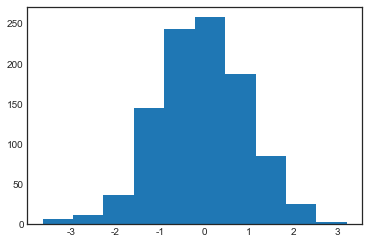

In [2]:
data = np.random.randn(1000)
plt.hist(data)
plt.show()

2. 自定义直方图

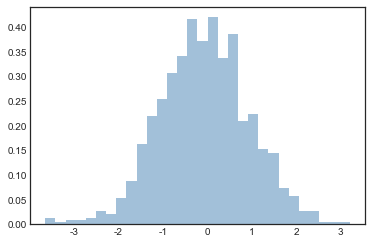

In [3]:
# density: y轴使用密度表示
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor=None)  
plt.show()

`alpha和histtype='stepfilled'`配合使用效果会好一点


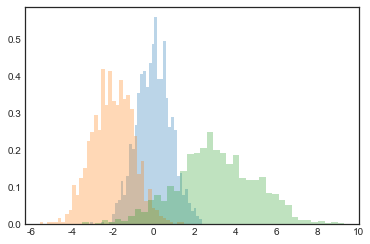

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

计算频次


In [7]:
counts, bin_edges = np.histogram(data, bins=10)
counts

array([  6,  11,  37, 145, 243, 258, 187,  85,  25,   3], dtype=int64)

### 二维频率直方图与数据区间划分

In [18]:
# 生成二维高斯分布
mean = [0, 0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

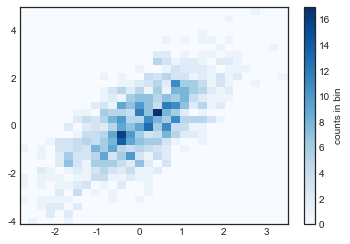

In [23]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.show()

In [25]:
counts, xedges, yedges = np.histogram2d(x, y, bins=10)

### `plt.hexbin`: 六边形区间划分

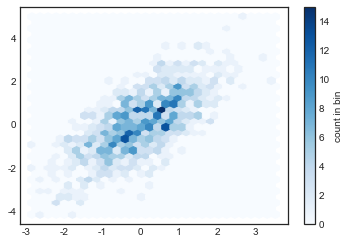

In [30]:
plt.hexbin(x, y, cmap='Blues', gridsize=30)
cb = plt.colorbar(label='count in bin')
plt.show()

### 核密度估计(kernel density estimate, KDE)

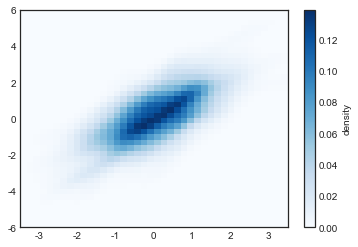

In [33]:
from scipy.stats import gaussian_kde
# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

## 配置图例

`plt.legend()`创建最简单的图例

In [82]:
import matplotlib.pyplot as plt 
%matplotlib inline 

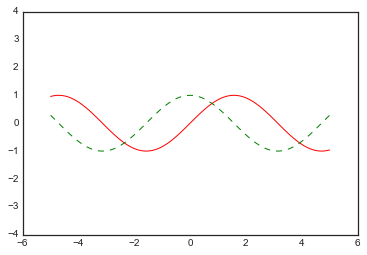

In [83]:
x = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), '-r', label='sin')
ax.plot(x, np.cos(x), '--g', label='cos')
ax.axis('equal')
fig.show()

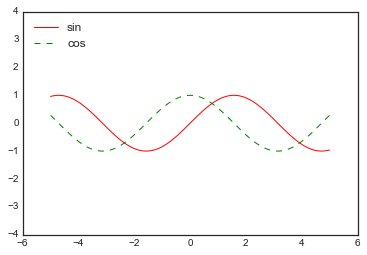

In [84]:
ax.legend(loc='upper left')
fig

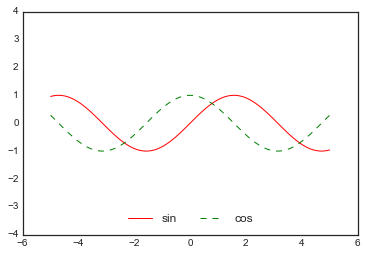

In [85]:
# 设置标签列数， ncol
ax.legend(loc='lower center', ncol=2)
fig

还可以为图例定义圆角边框（fancybox） 、 增加阴影、 改变外边框透
明度（framealpha 值） ， 或者改变文字间距

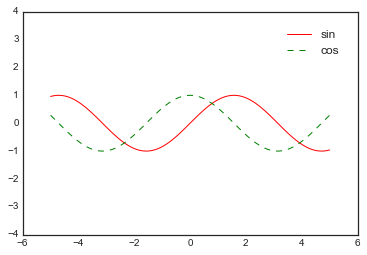

In [86]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### 选择图例显示的元素

plt.plot() 命令可以一次创建多条线， 返回线条实例列表

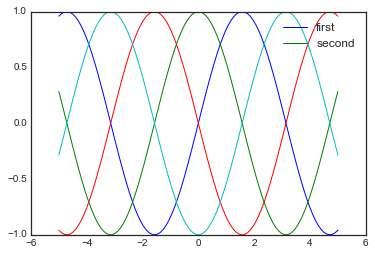

In [94]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

In [93]:
(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)).shape

(100, 4)